<a href="https://colab.research.google.com/github/lsmith01t/PROJECT_2/blob/main/Project2v1.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [110]:
df_1 = pd.read_csv('adult.csv')
df_1_ml = df_1.copy()

#Data Set 1 Adult Income Dataset

## 1.This data was obtained from Kaggles website. 
The data source can be located here: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

Acknowledgements:
This dataset named “adult” is found in the UCI machine learning repository
http://www.cs.toronto.edu/~delve/data/adult/desc.html


##2.The data set contains both discrete data as well as continuous. 

##3.The target of my project will be to predict if the income of each person is greater than 50k, or equal to or less than 50k, based on the other factors such as age, eduction, occupation, country as well as others. 

##4.Each row represents an individual person in the dataset. 

##5.This will be a classification problem, with the two classes being ">50k", and "<=50k".

##6.The data has 14 features.

##7.The data has 48,842 rows.

##8.Some concerns I see in the data set are related to missing data. I can see in the head of the data that there are several features with a ? where there should be data. 
##I also see that there are duplicate rows in the data. 
##Additionally, the dataset is already 5.6 MB, and I will have to One Hot Encode several of the features. This could cause the data set to get even much larger. 

In [111]:
df_1_ml.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [112]:
#With this step I can verify that we have no null fields. I can also verify the data field type. I can see there are none.
df_1_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [113]:
#This will allow me to identify if there are duplicate values in the data. I can see that there are 52
print(df_1_ml.duplicated().value_counts())



False    48790
True        52
dtype: int64


In [114]:
#This allow me to verify the object feature all have the correct classes. I can see that all classes for all features are correct. 
object_keys = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

for o in object_keys:
  print(df_1_ml[o].value_counts())
  print('\n')

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64


Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64


Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical      

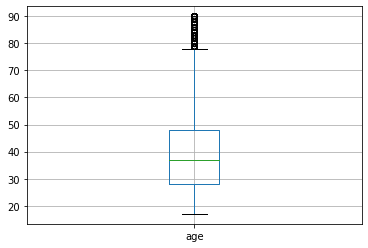

In [115]:
#These box plots allow me to visually see the outliers of each number feature. 
df_1_ml.boxplot(column = 'age');


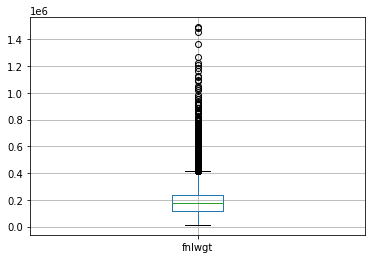

In [116]:
df_1_ml.boxplot(column = 'fnlwgt');

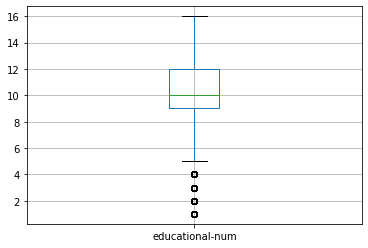

In [117]:
df_1_ml.boxplot(column = 'educational-num');

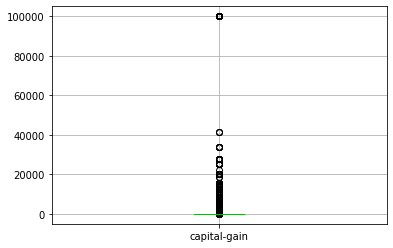

In [118]:
df_1_ml.boxplot(column = 'capital-gain');

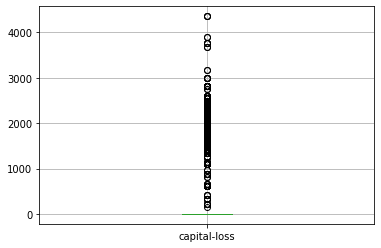

In [119]:
df_1_ml.boxplot(column = 'capital-loss');

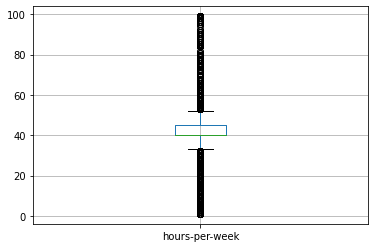

In [120]:
df_1_ml.boxplot(column = 'hours-per-week');

#Data Set 2 Credit Card Customer Prediction Dataset

##1. The data was downloaded from Kaggle. 

The data was found here: https://leaps.analyttica.com/home [Date Retrieved] from https://www.kaggle.com/datasets/whenamancodes/credit-card-customers-prediction

##2. The data is a collection of humans that are or were customers of a credit card company. 

##3. The target will be the "Atrrition_Flag" column. The objective will be to predict if customers will leave the company based on various features. 

##4. Each row represents one person in the study. 

##5. This is a classification problem. 

##6. The data has 23 features. 

##7. There are 10,127 rows. 

##8. The largest concern with the data is number of customers that churn. This is a small group of overall number and may not be a strong representation to predict attrition. 


In [121]:
#This will drop all the duplicate rows and then verify they have been dropped. 
df_1_ml.drop_duplicates(inplace=True)
print(df_1_ml.duplicated().value_counts())

False    48790
dtype: int64


In [122]:
df_2 = pd.read_csv('BankChurners.csv')
df_2_ml = df_2.copy()

In [123]:
df_2_ml.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [124]:
#can verify here if the data is missing values and if the data types are incorrect. Dropping the last two columns as these are calculations from someone elses work and I don't want them to skew the data. 
df_2_ml.info()
df_2_ml = df_2_ml.drop(columns ='Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1')
df_2_ml = df_2_ml.drop(columns ='Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [125]:
#verifying the columns were dropped. 
df_2_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [126]:
#Here I can search for duplicate values. I can see there are none.
print(df_2_ml.duplicated().value_counts())

False    10127
dtype: int64


In [127]:
#Here I can verify all the data values in the Objects columns are correct and there are no inconsistent values. 

print(df_2_ml['Attrition_Flag'].value_counts())
print(df_2_ml['Gender'].value_counts())
print(df_2_ml['Education_Level'].value_counts())
print(df_2_ml['Marital_Status'].value_counts())
print(df_2_ml['Income_Category'].value_counts())
print(df_2_ml['Card_Category'].value_counts())

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
F    5358
M    4769
Name: Gender, dtype: int64
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


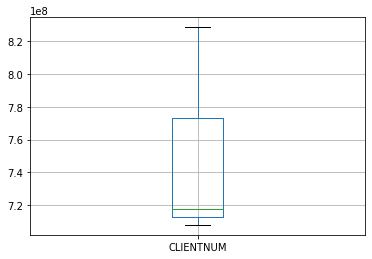

In [128]:
df_2_ml.boxplot(column = 'CLIENTNUM');

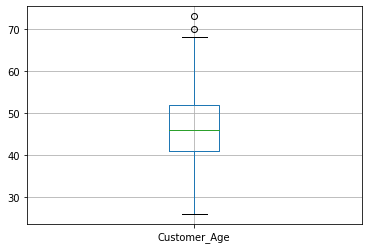

In [129]:
df_2_ml.boxplot(column = 'Customer_Age');

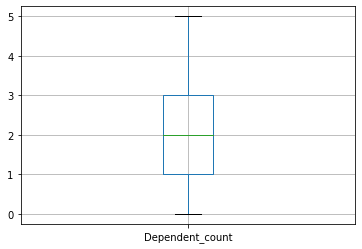

In [130]:
df_2_ml.boxplot(column = 'Dependent_count');

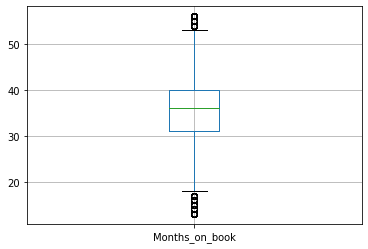

In [131]:
df_2_ml.boxplot(column = 'Months_on_book');

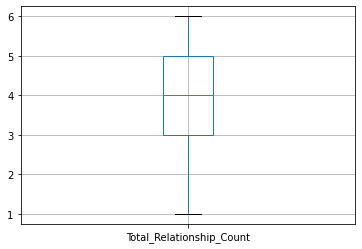

In [132]:
df_2_ml.boxplot(column = 'Total_Relationship_Count');

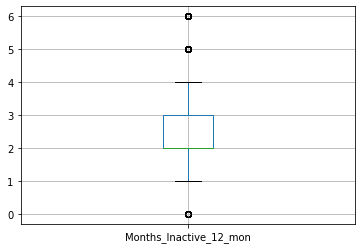

In [133]:
df_2_ml.boxplot(column = 'Months_Inactive_12_mon');

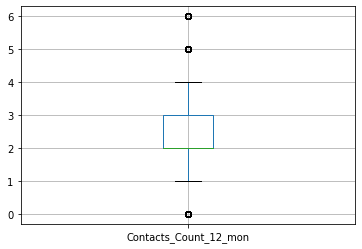

In [134]:
df_2_ml.boxplot(column = 'Contacts_Count_12_mon');

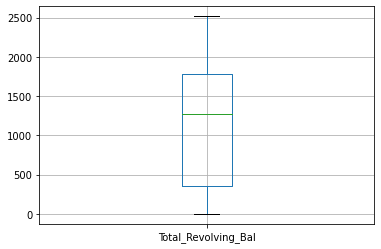

In [135]:
df_2_ml.boxplot(column = 'Total_Revolving_Bal');

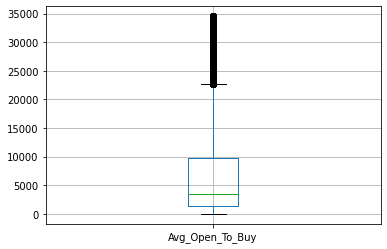

In [136]:
df_2_ml.boxplot(column = 'Avg_Open_To_Buy');

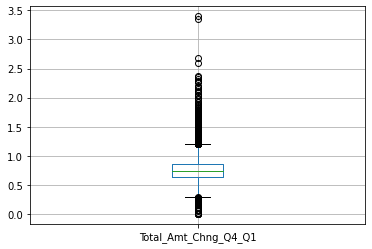

In [137]:
df_2_ml.boxplot(column = 'Total_Amt_Chng_Q4_Q1');

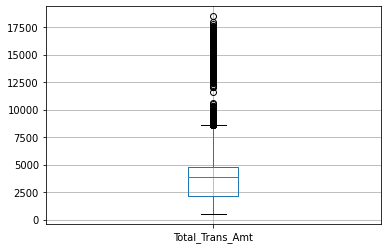

In [138]:
df_2_ml.boxplot(column = 'Total_Trans_Amt');

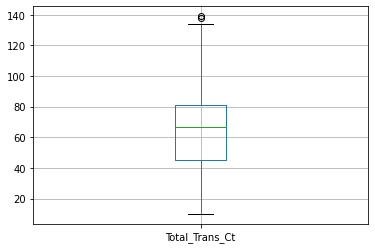

In [139]:
df_2_ml.boxplot(column = 'Total_Trans_Ct');

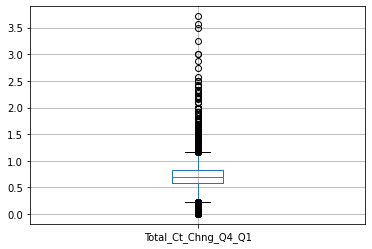

In [140]:
df_2_ml.boxplot(column = 'Total_Ct_Chng_Q4_Q1');

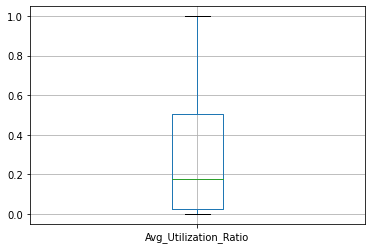

In [141]:
df_2_ml.boxplot(column = 'Avg_Utilization_Ratio');